In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.data import load
from nltk.stem import SnowballStemmer
from string import punctuation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marii\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marii\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df_case_2 = pd.read_csv("dataset_Caso_2.csv")

In [3]:
spanish_stopwords = stopwords.words('spanish')
stemmer = SnowballStemmer('spanish')
non_words = list(punctuation) #elimina puntiación 
non_words.extend(['¿', '¡']) 
non_words.extend(map(str,range(10)))



In [4]:
def limpiar_texto(texto):
    texto = texto.lower() #pasa todas las palabras a minusculas
    menciones = re.sub(r'@\w+\s', ' ', texto)  # Elimina menciones
    urls = re.sub(r'http\S+|www\S+', ' ', menciones)  # Elimina urls
    saltos = urls.replace('\n', ' ') #Elimina saltos de linea
    emojis = re.sub(r'[^\w\s,]', '', saltos) #Elimina emojis
    text = ''.join([c for c in emojis if c not in non_words]) 
    return text
    
# Aplicar la función 
df_case_2['tweets_limpios'] = df_case_2['texto_tweet'].apply(limpiar_texto)


Hasta aqui se ha hecho un barrido y limpieza de los caracteres extras que traen los twwets, las menciones como @CajaLosAndes, saltos de lineas "\n" y las url de los tweets. Esta limpieza se hizo ya que no suele ser relevante para el analisis de sentimiento. sim embargo esta limpieza se añade como columna extra para poder comparar.

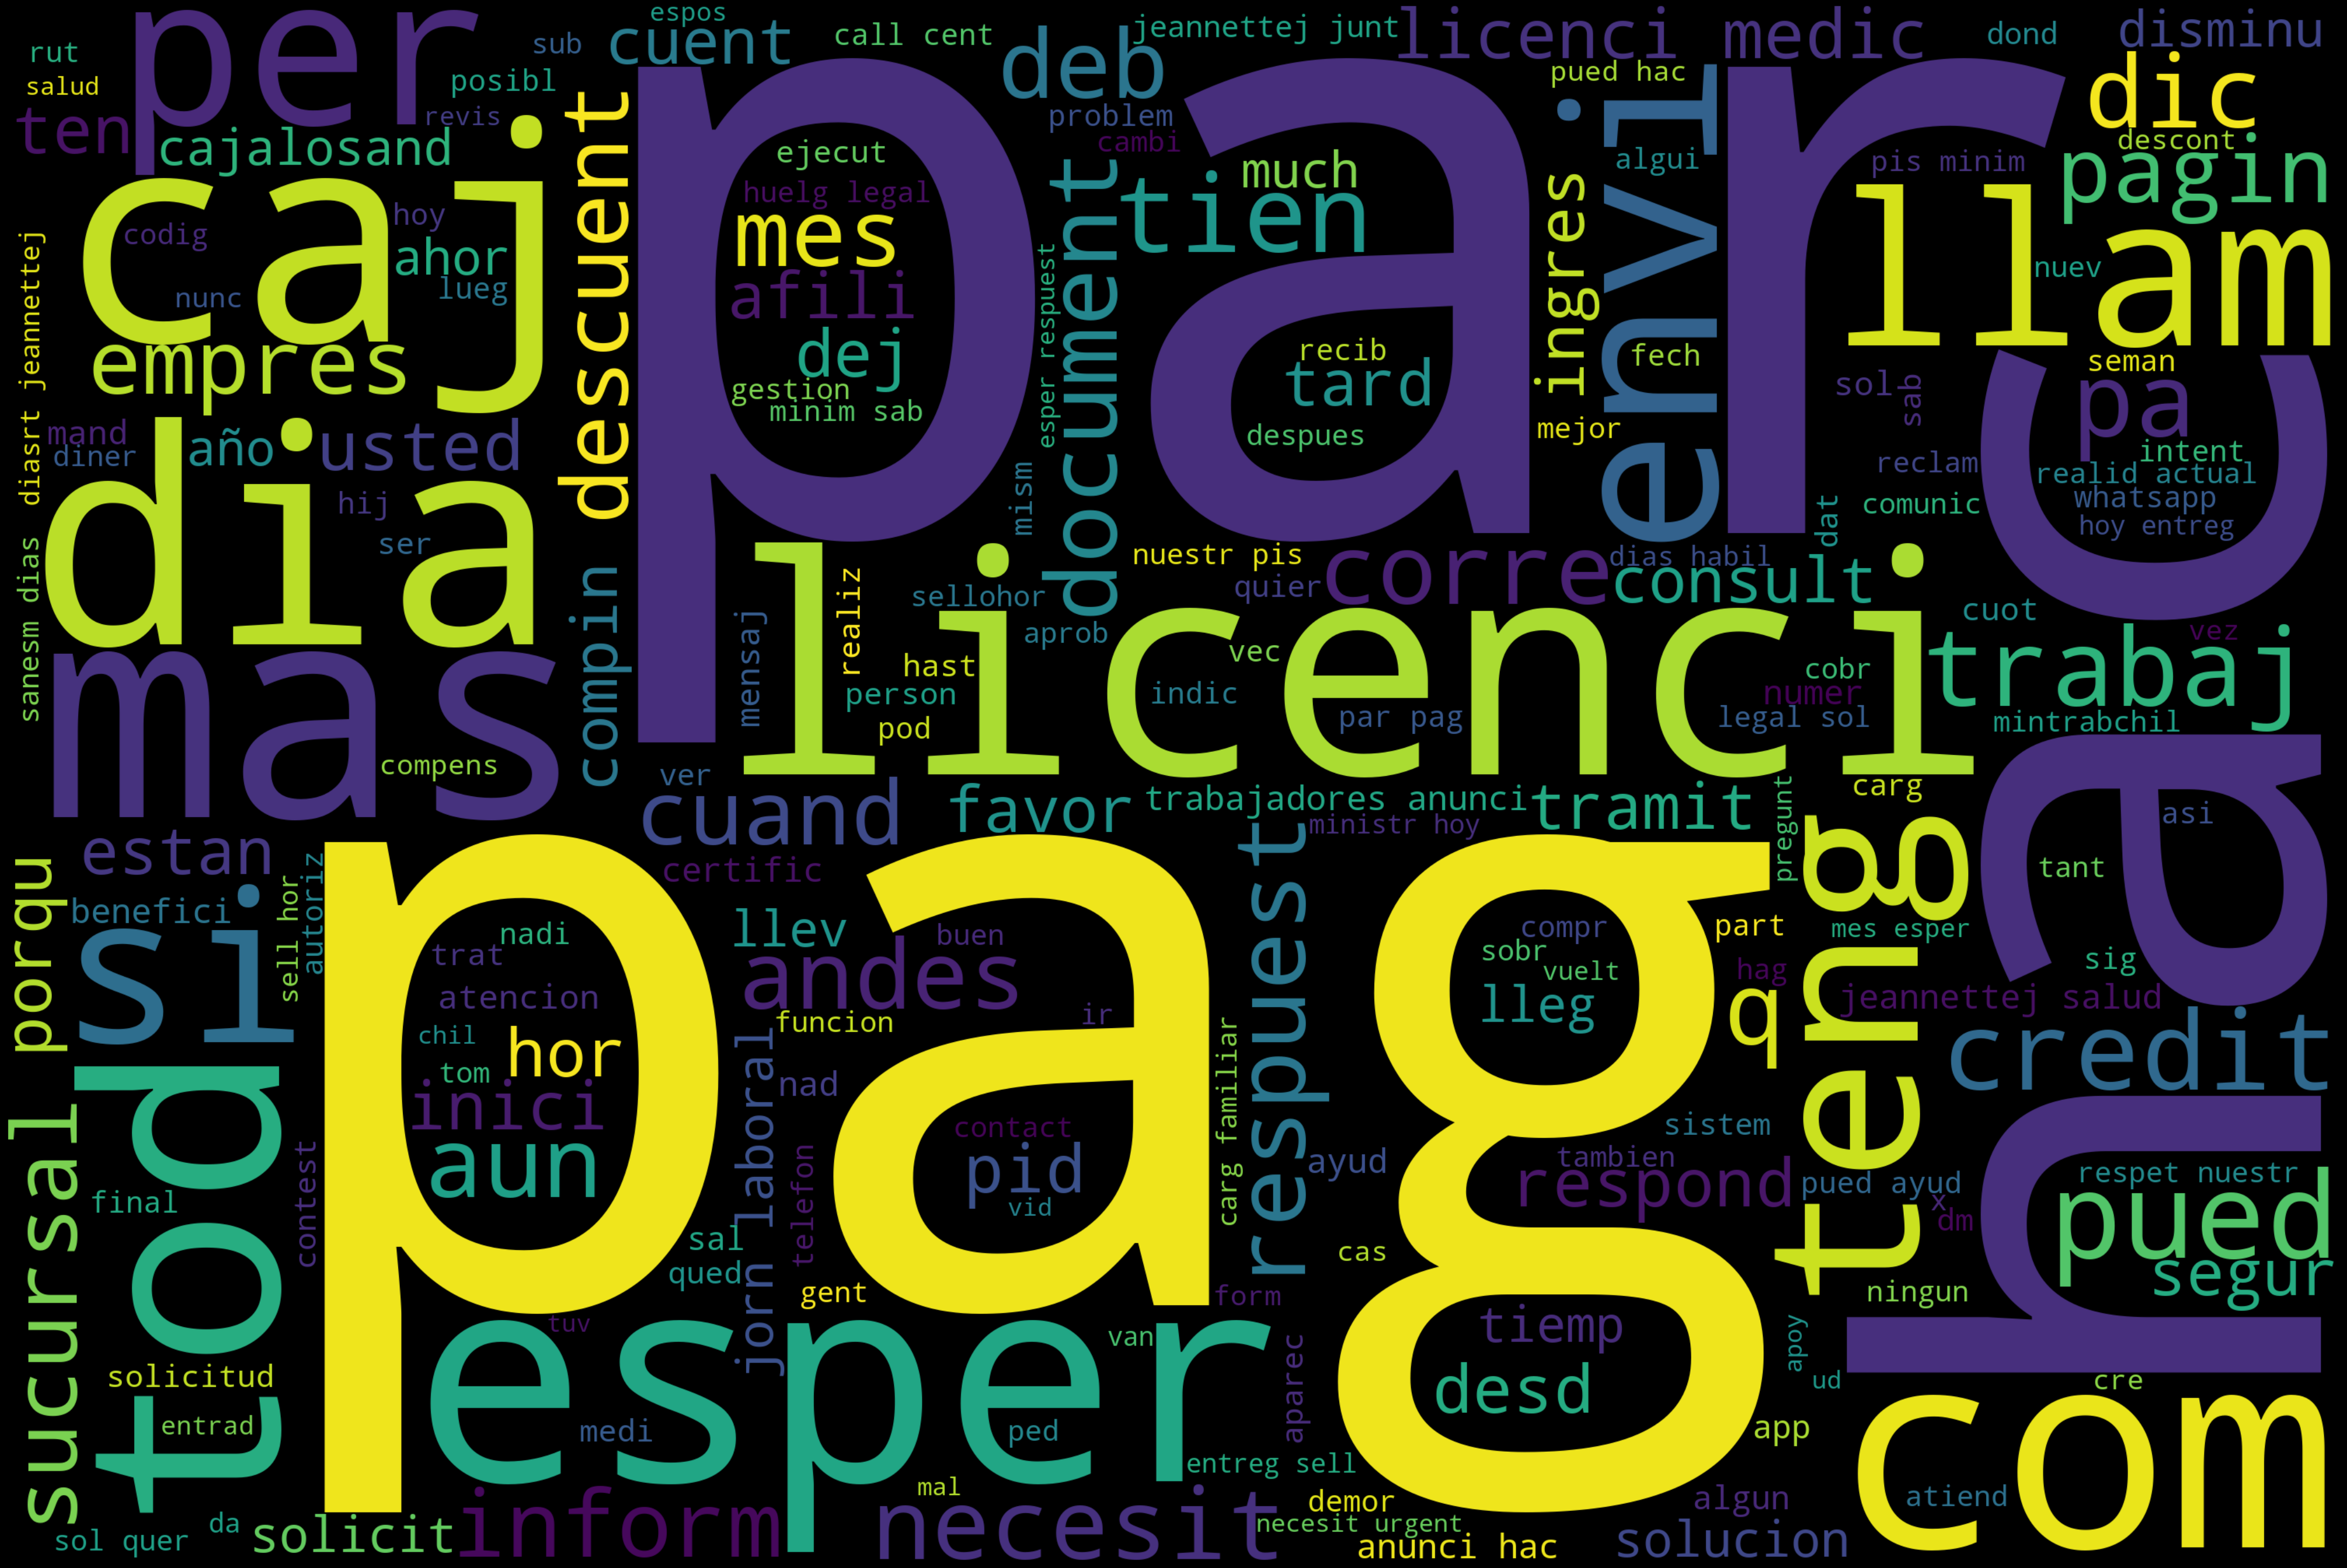

In [5]:
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed
    #return tokens

    
def tokenize(text):
    text = ''.join([c for c in text if c not in non_words])
    tokens =  word_tokenize(text)
    # stem
    try:
        stems = stem_tokens(tokens, stemmer)
    except Exception as e:
        print(e)
        print(text)
        stems = ['']
    return stems



df_case_2['comentario_normalizado'] = df_case_2['tweets_limpios'].apply(lambda x: tokenize(x))
df_case_2['comentario_normalizado'] = df_case_2['comentario_normalizado'].apply(lambda x: ', '.join(x))

words = " ".join(df_case_2['comentario_normalizado'].values)
text = "".join([word for word in words.split()])
#text = " ".join(review for review in DF['comentario'].str.lower()) 

wordcloud = WordCloud(
    stopwords=spanish_stopwords, 
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Hasta esta sección se realizó una bolsa de palabras para saber cuales son las que mas se repiten, ya que no se sabe cuales son las existen ni las que hacen mencion a alguna caracteristica positiva o negativa del mensaje o tweet.

Tambien se realiza una normalizacion de las palabras relevantes y tambien se mantienen sus raices, debido a que algunas palabras en su totalidad no suelen ser de gran importancia.

In [6]:
from textblob import TextBlob

In [7]:
def texto(score):
    if score > 0:
        return "positivo"
    elif score == 0:
        return "neutral"
    else:
        return "negativo"  

def sentiment_calc(text):
    try:
        return texto(TextBlob(text).sentiment.polarity)
    
    except Exception as e:
        print(e)
        return None

df_case_2['polaridad_sin_limpieza'] = df_case_2['texto_tweet'].apply(sentiment_calc)
df_case_2['polaridad_normalizada'] = df_case_2['comentario_normalizado'].apply(sentiment_calc)
df_case_2['polaridad_con_limpieza'] = df_case_2['tweets_limpios'].apply(sentiment_calc)

Con las funciones anteriores se busca poder analizar sentimiento con textBlob, se aplico a las 3 columnas y se obtuvieron los siguientes resultados

In [8]:
df_case_2

,texto_tweet,tweets_limpios,comentario_normalizado,polaridad_sin_limpieza,polaridad_normalizada,polaridad_con_limpieza
0,¡Atención! @ElMercurio_cl y @CajaLosAndes dest...,atención y destacaron a congresofuturo como ...,"atencion, y, destac, a, congresofutur, com, un...",positivo,positivo,positivo
1,@CajaLosAndes el dia 9 de abril fui a @Cinepo...,el dia de abril fui a y no me aceptaron el...,"el, dia, de, abril, fui, a, y, no, me, acept, ...",positivo,positivo,positivo
2,"@CajaLosAndes Hola, Les envié DM para que me p...",hola les envié dm para que me puedan ayudar c...,"hol, les, envi, dm, par, que, me, pued, ayud, ...",neutral,neutral,neutral
3,"@CajaLosAndes hola, necesito saber en que tram...",hola necesito saber en que tramo de carga fam...,"hol, necesit, sab, en, que, tram, de, carg, fa...",positivo,neutral,positivo
4,Convenio DIVBIE - Caja Los Andes\n\nPara el pe...,convenio divbie caja los andes para el perso...,"conveni, divbi, caj, los, andes, par, el, pers...",positivo,neutral,positivo
...,...,...,...,...,...,...
2644,@CajaLosAndes Necesito agregar mis datos banca...,necesito agregar mis datos bancarios para el ...,"necesit, agreg, mis, dat, bancari, par, el, pa...",neutral,neutral,neutral
2645,Me llamaron de @CajaLosAndes para ofrecerme un...,me llamaron de para ofrecerme un seguro y me ...,"me, llam, de, par, ofrec, un, segur, y, me, pr...",neutral,negativo,neutral
2646,"@CajaLosAndes Estimados, buen día... existe al...",estimados buen día existe alguna otra forma d...,"estim, buen, dia, exist, algun, otra, form, de...",neutral,positivo,neutral
2647,@yesseni55730686 @tiomattu @CajaLosAndes @gabr...,y cuanto alcanzaste a pagar cuantas cuotas...,"y, cuant, alcanz, a, pag, cuant, cuot, en, tod...",neutral,neutral,neutral


El analisis de la polaridad entre los tweets sin limpieza y la columna de los tweets limpios no tienen gran similitud y suele ser un poco mas preciso con respecto a la columna normalizada, es decir, la que tiene el texto filtrado y palabras modificadas. Sin embargo puede ser no tan preciso debido a que analizando de manera exhaustiva, hay comentarios que suelen ser mas negativo o neutral que positivo, como los tweet que tienen preguntas aludiendo a la negatividad, como cuando a un cliente no tiene satisfaccion con algun beneficio.


A este analisis se le pueden hacer muchas modificaciones y concluir de otras maneras, quizas extrayendo palabras que sean mas precisas y de utilidad para generar conlcuisiones con mayor claridad y asigandole una mejor polaridad que se asemeje al que mejor lo represente.

Y tambien usar mejores modelos de precicion, como spaCy, con entornos mas sofisticados para su uso.